<a href="https://colab.research.google.com/github/Ifetayo-Adebola/Machine-Learning/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [162]:
! pip install dataprep
! pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


# **Load Data**


In [95]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign/marketing_campaign (1).csv', sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
data.head(10).style.background_gradient(cmap = 'Blues_r', text_color_threshold = 0.1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# **Data Preprocessing**



In [97]:
# Checking the dataset shape

data.shape

(2240, 29)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observation:
There are three (3) object datatype and the rest are numerical.



In [99]:
# Finding the unique values number present in each column

data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Observation:
"Z_CostContact" and "Z_Revenue" are of the same value in all rows and they are going to be dropped as they have no contribution in the model building.**bold text**

In [100]:
# Checking if any NaN is present in the column or not

data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Observation:
The Income column have some missing value in it therefore it will be filled in using either mean or median

<Axes: >

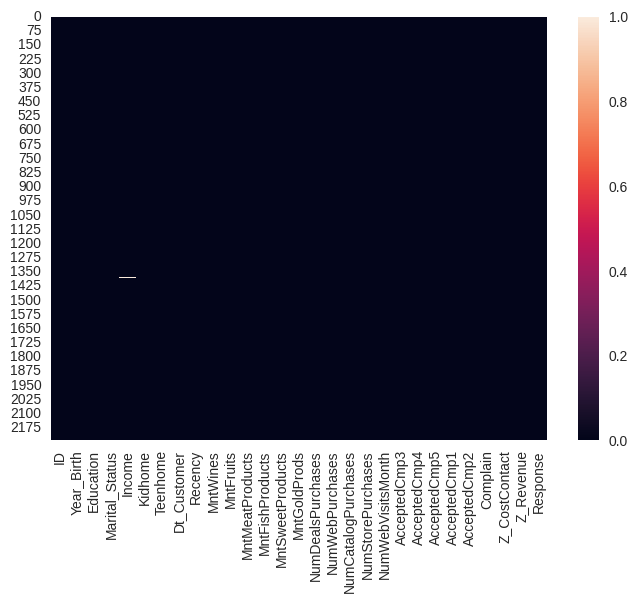

In [101]:
# Checking for null value using heatmap

sns.heatmap(data.isnull())

In [102]:
# Dropping "Z_CostContact" and "Z_Revenue" as they will not contribute in  the model building

data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [103]:
# Removing null values
data = data.dropna()
print(f"After the null values were removed data contains {len(data)}")

After the null values were removed data contains 2216


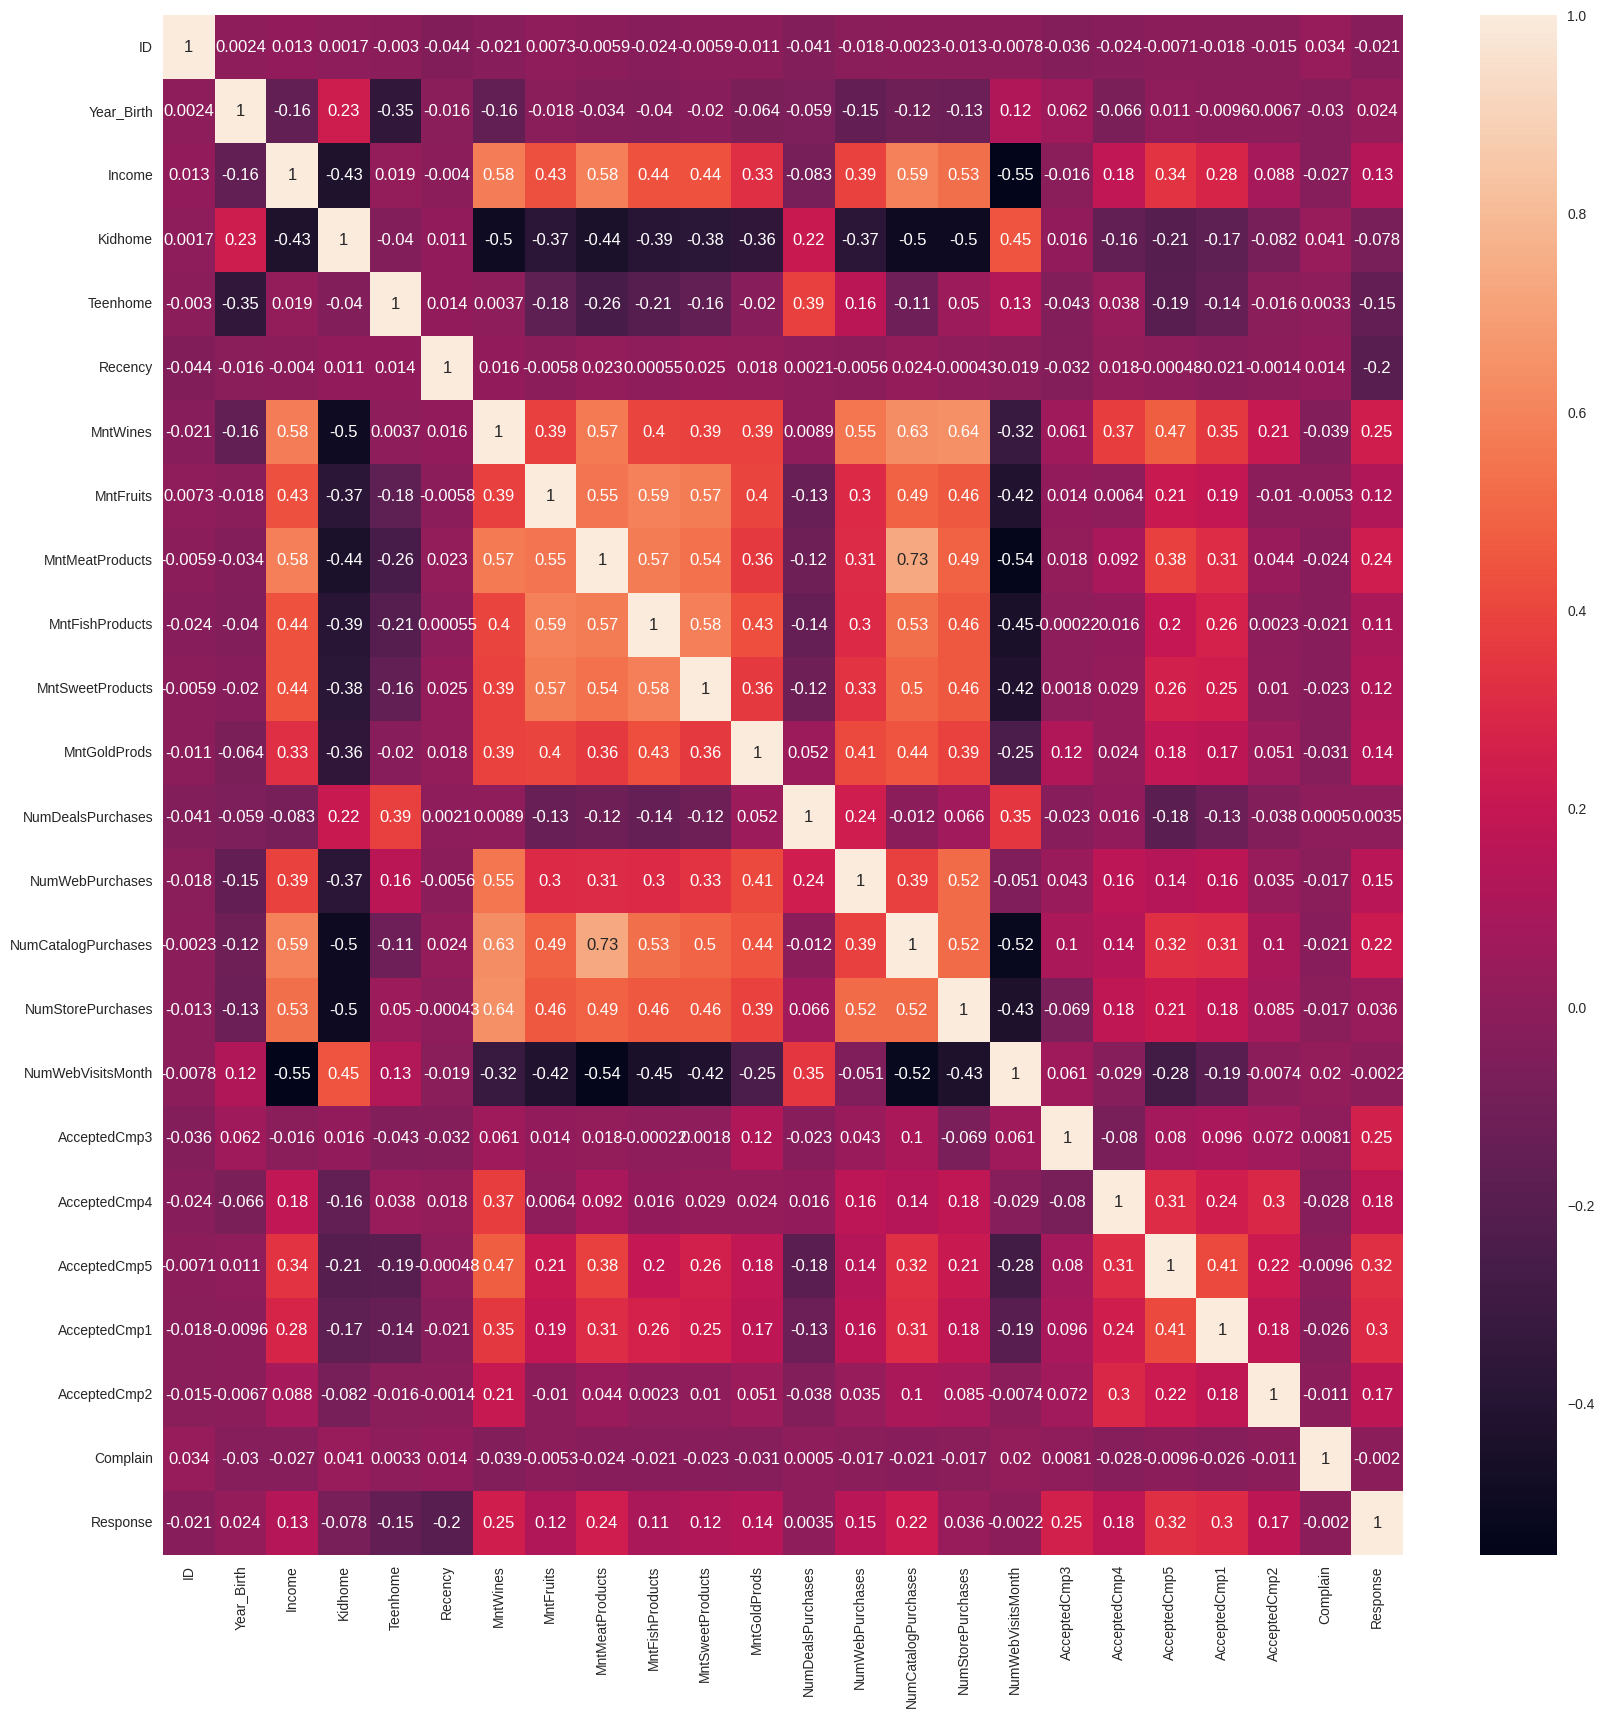

In [104]:
# Finding correlation between the features column

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observation:
The columns are unique as there are no too much correlation obvious with each other so no column will be drop based on correlation.bold text

In [105]:
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False) [24:50:2]

NumCatalogPurchases  MntMeatProducts      0.734127
NumStorePurchases    MntWines             0.640012
NumCatalogPurchases  MntWines             0.634753
MntFruits            MntFishProducts      0.593431
NumCatalogPurchases  Income               0.589162
Income               MntMeatProducts      0.584633
MntFishProducts      MntSweetProducts     0.583867
Income               MntWines             0.578650
MntMeatProducts      MntFishProducts      0.573574
MntFruits            MntSweetProducts     0.571606
MntWines             MntMeatProducts      0.568860
NumWebPurchases      MntWines             0.553786
Income               NumWebVisitsMonth    0.553088
dtype: float64

In [106]:
# Filling the missing value observed in the income using mean.

data['Income'] = data["Income"].fillna(data['Income'].mean())
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [107]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


# Data Manipulation

In [108]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
print("The recent customer's enrolment date is:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date is:", min(data['Dt_Customer']))

The recent customer's enrolment date is: 2014-12-06 00:00:00
The oldest customer's enrolment date is: 2012-01-08 00:00:00


In [109]:
# Checking number of unique categories in the 'Marital_Status'
print("Total categories in the feature Marital_Status:\n", data['Marital_Status'].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [110]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [111]:
data['Marital_Status'].value_counts()

relationship    1430
Single           786
Name: Marital_Status, dtype: int64

In [112]:
mean_value = data['Income'].mean()
data['Income'].fillna(value=mean_value,inplace=True)

# Merging instances from the same category

In [113]:
data['Kids'] = data['Kidhome'] + data['Teenhome']

In [114]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntSweetProducts']
+ data['MntMeatProducts'] + data ['MntFishProducts'] + data['MntGoldProds']

0       806
1        14
2       280
3        35
4       179
       ... 
2235    471
2236     38
2237    273
2238    355
2239     84
Length: 2216, dtype: int64

In [115]:
data['Total_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] 
+ data['AcceptedCmp4'] + data['AcceptedCmp5']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Length: 2216, dtype: int64

In [116]:
data['Total_Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] 
+ data['NumCatalogPurchases'] + data['NumStorePurchases']

0       14
1        3
2       12
3        4
4        9
        ..
2235     7
2236     7
2237    16
2238    15
2239     5
Length: 2216, dtype: int64

In [119]:
# Dropping some column to reduce the dimension and model complexity
# data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
#           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis = 1,
#inplace = True)

In [120]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,Total_Cmp,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,0,811,0,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,2,13,0,3
2,4141,1965,Graduation,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,496,0,9
3,6182,1984,Graduation,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,1,18,0,4
4,5324,1981,PhD,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,243,0,10


In [121]:
# Adding a column feature "Age" in the dataframe

data['current_year'] = 2023
data['Age'] = data['current_year'] - data['Year_Birth']



In [122]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [123]:
# Changing the feature "Education" into three(3) categories only
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
data['Education'] = data['Education'].replace(['Basic'], 'UG')

In [124]:
data=data.drop(columns=['ID', 'Dt_Customer', 'Year_Birth','Recency','Complain'],axis=1)
data.shape

(2216, 28)

In [125]:
data.describe().style.background_gradient(cmap='Blues_r', text_color_threshold = 0.1 )

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Kids,Expenses,Total_Cmp,Total_Purchases,current_year,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.947202,358.476534,0.151173,6.408845,2023.000000,54.179603
std,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.749062,374.346521,0.410009,3.709398,0.000000,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2023.000000,27.000000
25%,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,4.000000,2023.000000,46.000000
50%,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,223.500000,0.000000,6.000000,2023.000000,53.000000
75%,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,604.000000,0.000000,9.000000,2023.000000,64.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1622.000000,3.000000,27.000000,2023.000000,130.000000


# **Visualization**

In [126]:
# Initializing Color pallets
from matplotlib import colors

sns.set(rc={"axes.facecolor": "#edf9ff", "figure.facecolor": "#edf9ff"})
pallet = ["#2f2f68", "#6f729e", "#b1b2d6", "#c9c0b9", "#788a9f", "#60abf3"]
cmap = colors.ListedColormap(["#2f2f68", "#6f729e", "#D6B2B1", "#b1b2d6", "#c9c069" ])
pal = ["#2f2f68", "#c9c0b9", "#788a9f", "60acf3"]

Correlative Plots Of Some Features


<Figure size 800x550 with 0 Axes>

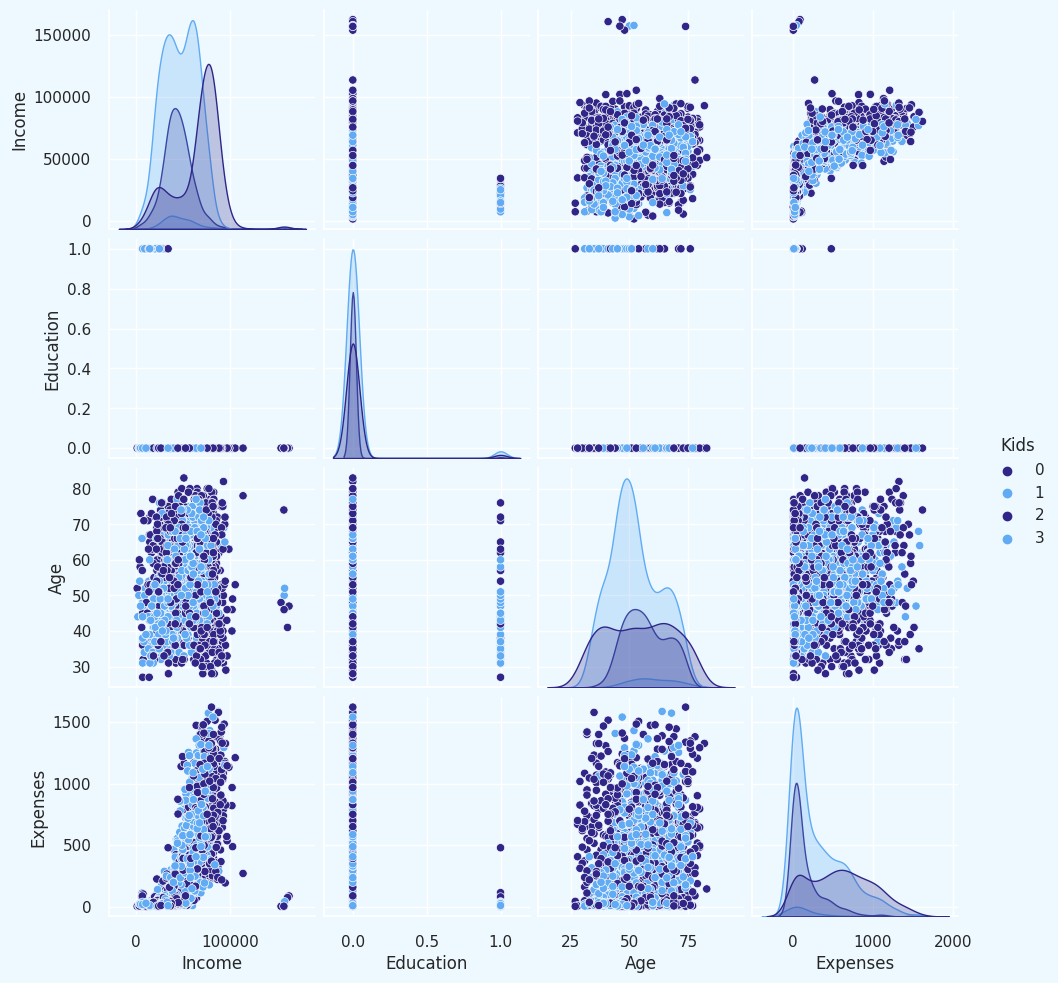

In [156]:
# Features Plotting

To_Plot = ["Income", "Education", "Age", "Expenses", "Kids"]

print("Correlative Plots Of Some Features")
plt.figure()
sns.pairplot(data[To_Plot], hue="Kids", palette=(["#2f2688", "#60abf3"]))
plt.show()

Observations: From the plots above, it is evident that there are some outliers in the income and age features. These outliers may impact negatively on the analysis accuracy, and will be removed from the data. This is to ensure we have a more reliable and accurate model result.

In [128]:
#Dropping the outliers by setting a threshold on Age and Income features.
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print(F"The total data points after outliers removal are: {len(data)} ")

The total data points after outliers removal are: 2212 


In [129]:
figure = px.bar(data, x='Marital_Status', y='Expenses', color="Education")
figure.show()

In [130]:
fig = px.bar(data, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

In [131]:
figure = px.histogram(data, x= 'Education', hover_data=data.columns, title='Distribution of Education')
figure.show()

In [132]:
fig =px.histogram (data, x = "Expenses", facet_row ="Marital_Status", template = 'none')
fig.show()

<Axes: >

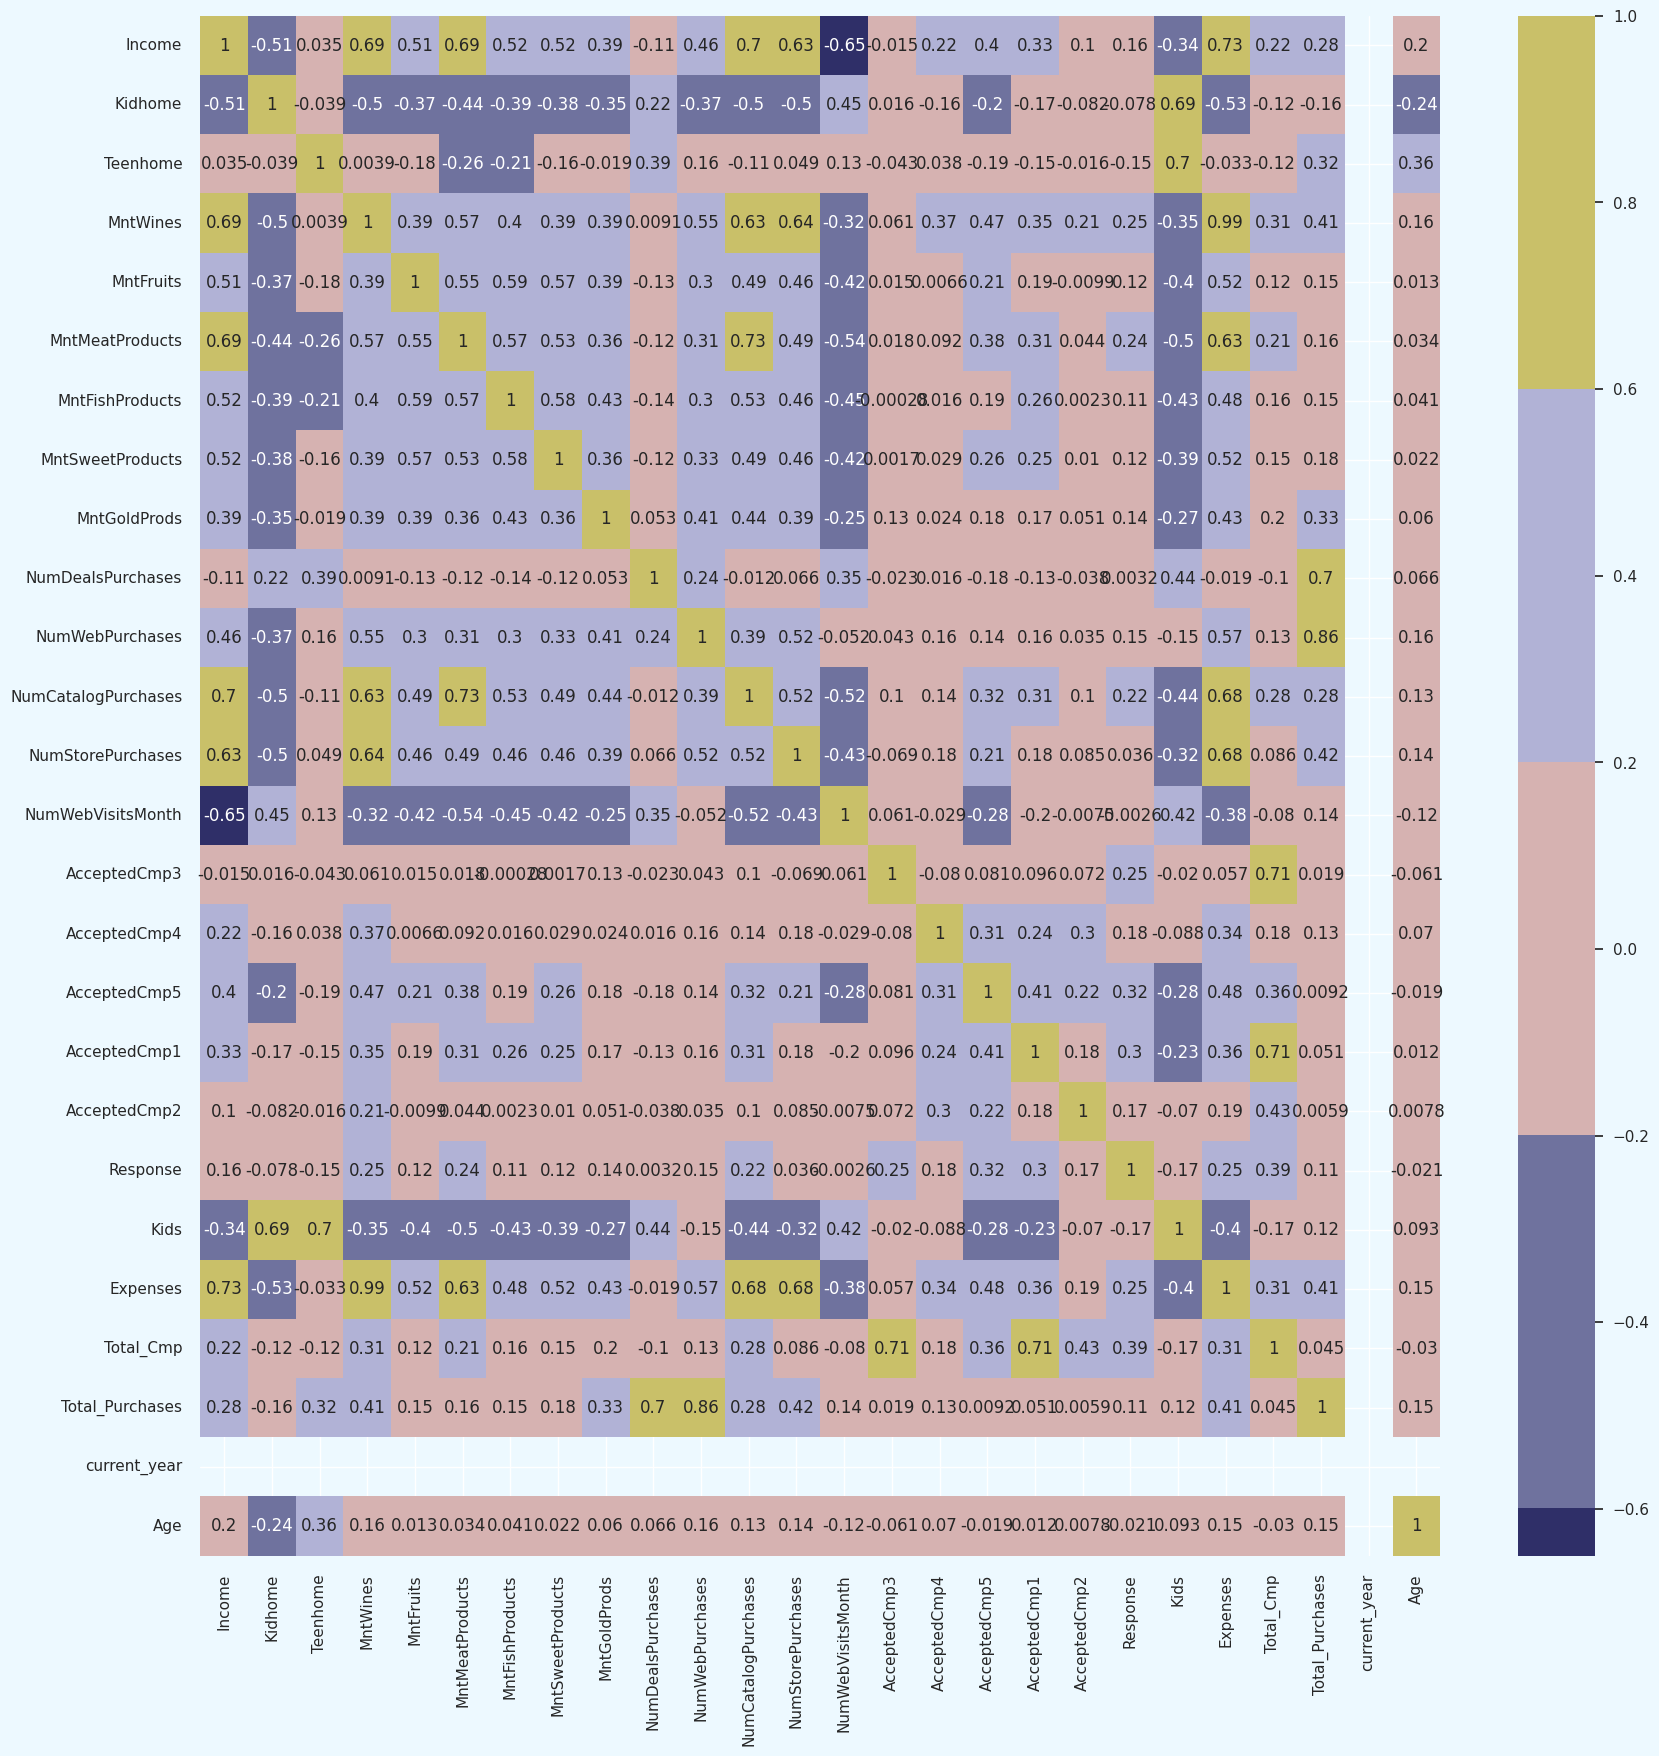

In [133]:
# Checking for correlation after the removal of outliers
cor_mat = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor_mat, annot=True, cmap=cmap, center=0)

In [134]:
#checking for categorical variables in the dataframe
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [135]:
# Using Label Encoding to convert the categorical data into numerical
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in object_cols:
  data[i] = data[[i]].apply(LE.fit_transform)
print("All features are now numerical")

All features are now numerical


In [136]:
fig = px.histogram(data, x = "Expenses", facet_row = "Education", template ='none')
fig.show()

In [165]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Kids,Expenses,Total_Cmp,Total_Purchases,current_year,Age,Clusters
0,0,0,58138.0,0,0,635,88,546,172,88,...,0,0,1,0,811,0,11,2023,66,3
1,0,0,46344.0,1,1,11,1,6,2,1,...,0,0,0,2,13,0,3,2023,69,0
2,0,1,71613.0,0,0,426,49,127,111,21,...,0,0,0,0,496,0,9,2023,58,3
3,0,1,26646.0,1,0,11,4,20,10,3,...,0,0,0,1,18,0,4,2023,39,0
4,0,1,58293.0,1,0,173,43,118,46,27,...,0,0,0,1,243,0,10,2023,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,61223.0,0,1,709,43,182,42,118,...,0,0,0,1,870,0,11,2023,56,2
2236,0,1,64014.0,2,1,406,0,30,0,0,...,1,0,0,3,406,1,15,2023,77,2
2237,0,0,56981.0,0,0,908,48,217,32,12,...,0,0,0,0,968,1,3,2023,42,3
2238,0,1,69245.0,0,1,428,30,214,80,30,...,0,0,0,1,488,0,8,2023,67,2


In [138]:
#Creating a copy of data
data_copy = data.copy()

data.drop = data_copy

# Scaling
scaler = StandardScaler()
scaler.fit(data_copy)
scaled_ds = pd.DataFrame(scaler.transform(data_copy), columns=data_copy.columns)
print("All features are now scaled using standard scaler")

All features are now scaled using standard scaler


In [139]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Kids', 'Expenses',
       'Total_Cmp', 'Total_Purchases', 'current_year', 'Age'],
      dtype='object')

In [140]:
# Initializing PCA to reduce features to three (3)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.638231e-16,2.845625,-4.981119,-2.586763,-0.656055,2.278433,9.021814
col2,2212.0,-3.212219e-17,1.741115,-4.598894,-1.385384,-0.258126,1.171131,7.002068
col3,2212.0,-4.818328e-17,1.566065,-3.340009,-0.858972,-0.155655,0.288523,10.487769


Text(0.5, 0.92, 'This is a 3D Data-Projection in the Reduced Dimension')

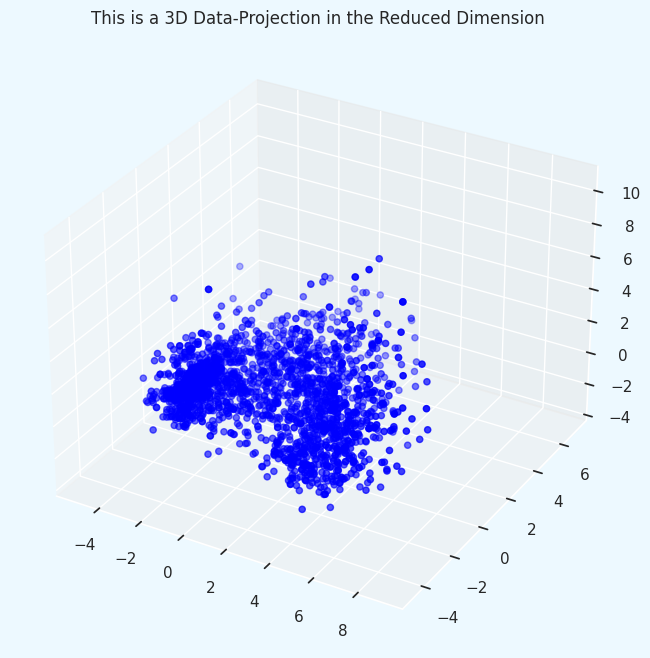

In [141]:
# Showing a 3D Projection of Data in the reduced Dimension
x = pca_ds["col1"]
y = pca_ds["col2"]
z = pca_ds["col3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", marker="o")
ax.set_title("This is a 3D Data-Projection in the Reduced Dimension")

# Normalization

In [142]:
#data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))
#data_norm.tail(5)

# **Clustering**

Elbow Method to determine the number of clusters to be formed:


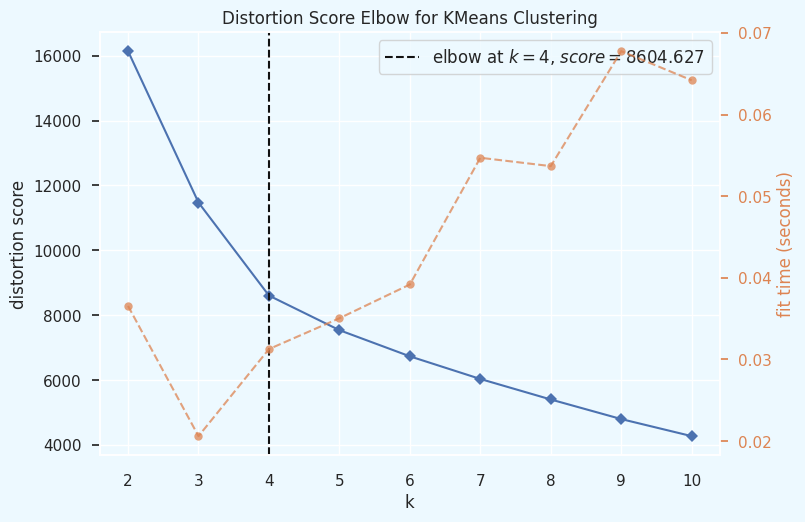

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print("Elbow Method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_ds)
Elbow_M.show()

In [144]:
#Initializing Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
#fit the model and predict the clusters
yhat_AC = AC.fit_predict(pca_ds)
pca_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the original dataframe.
data["Clusters"] = yhat_AC

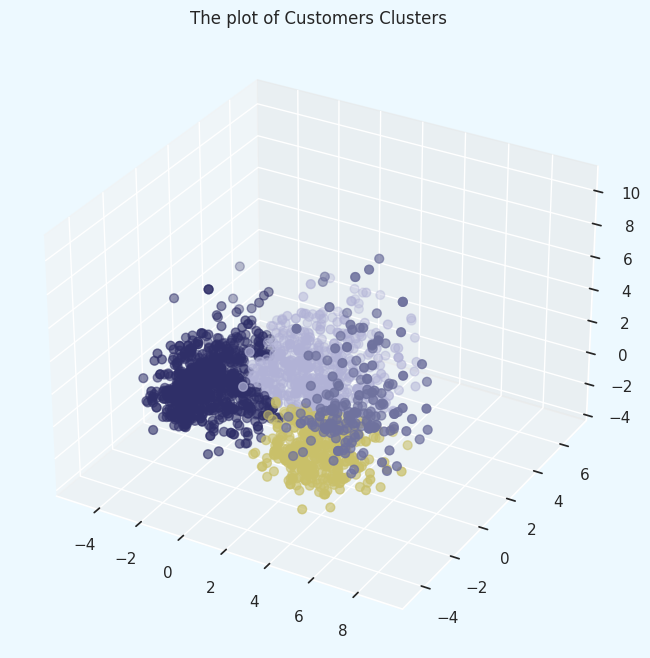

In [145]:
# Clusters Plotting
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The plot of Customers Clusters")
plt.show()

# **Model Evaluation**

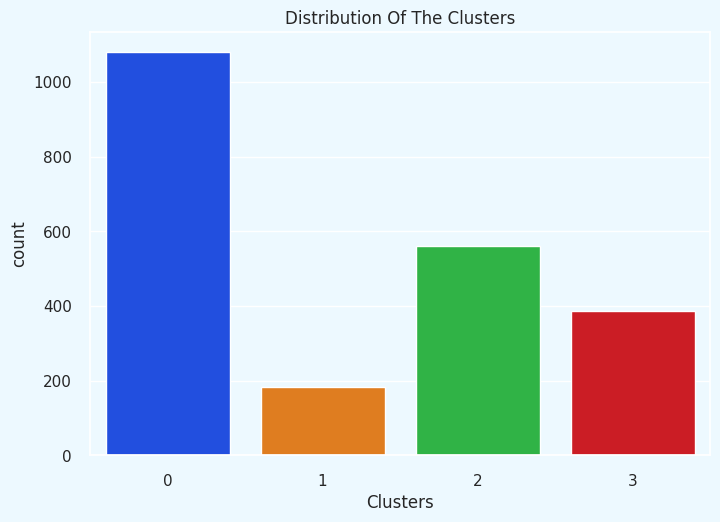

In [146]:
# Showing the clusters distribution
fig = sns.countplot(x=data['Clusters'], palette='bright')
fig.set_title('Distribution Of The Clusters')
plt.show()

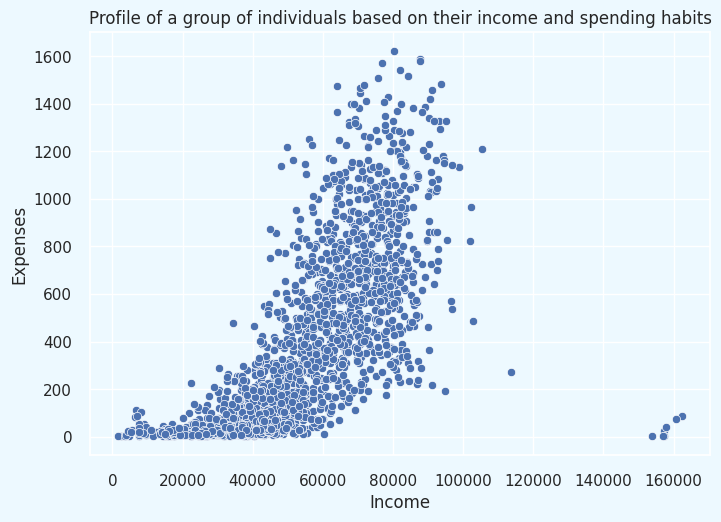

In [147]:
# Profiling segments of individuals based on their Income and Expense.
fig = sns.scatterplot(data=data, x=data["Income"], y=data["Expenses"],palette='bright')
fig.set_title("Profile of a group of individuals based on their income and spending habits")
plt.legend()
plt.show()

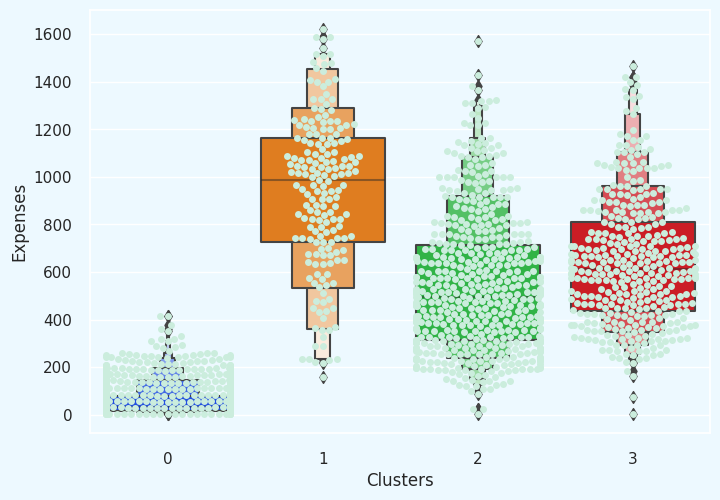

In [148]:
plt.figure()
fid = sns.swarmplot(x=data["Clusters"], y=data["Expenses"], color="#CBEDDD")
fig = sns.boxenplot(x=data["Clusters"], y=data["Expenses"], palette="bright")
plt.show()

*Exploring past campaigns*

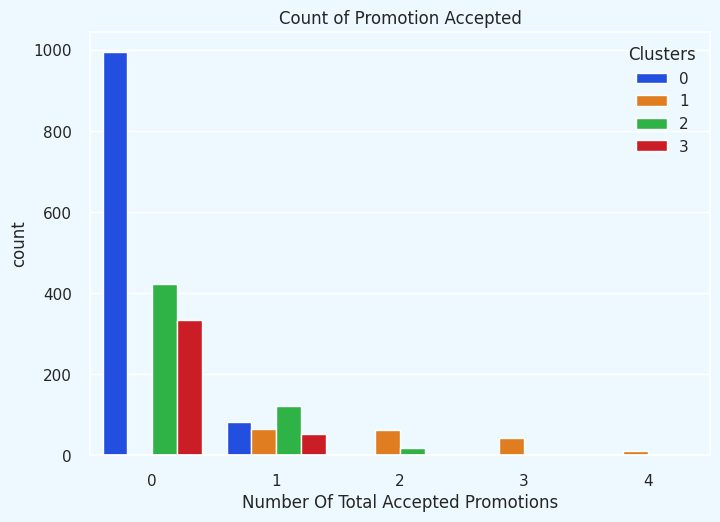

In [149]:
#Creating a feature for the sum of accepted campaigns

data['Total_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

plt.figure()
fig = sns.countplot(x=data["Total_Cmp"], hue=data["Clusters"], palette='bright')
fig.set_title("Count of Promotion Accepted")
fig.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

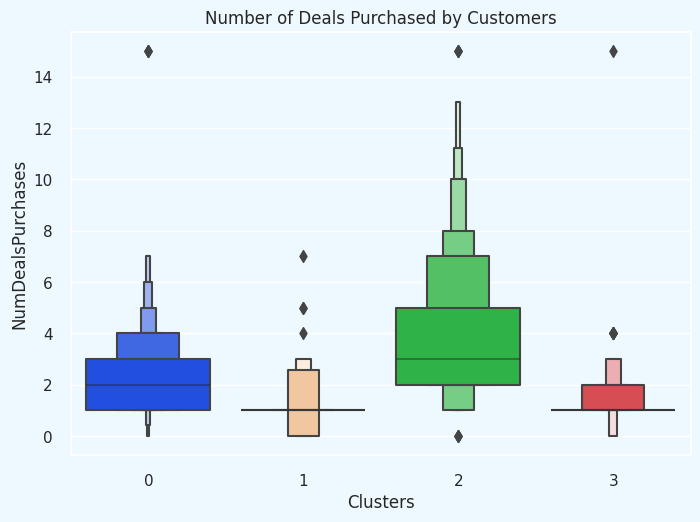

In [150]:
# Plotting number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette='bright')
pl.set_title("Number of Deals Purchased by Customers")
plt.show()

# Profiling Customers to determine valuable targeted groups

<Figure size 800x550 with 0 Axes>

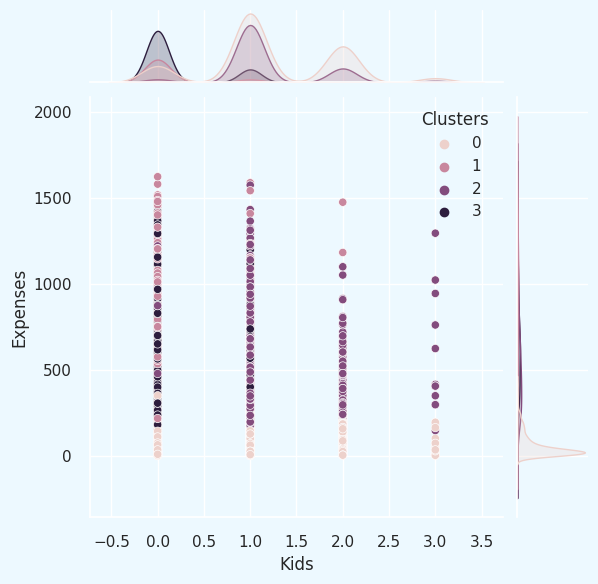

<Figure size 800x550 with 0 Axes>

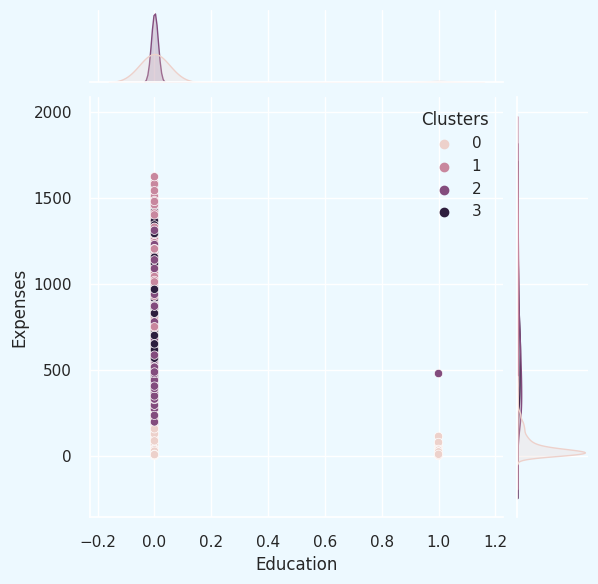

<Figure size 800x550 with 0 Axes>

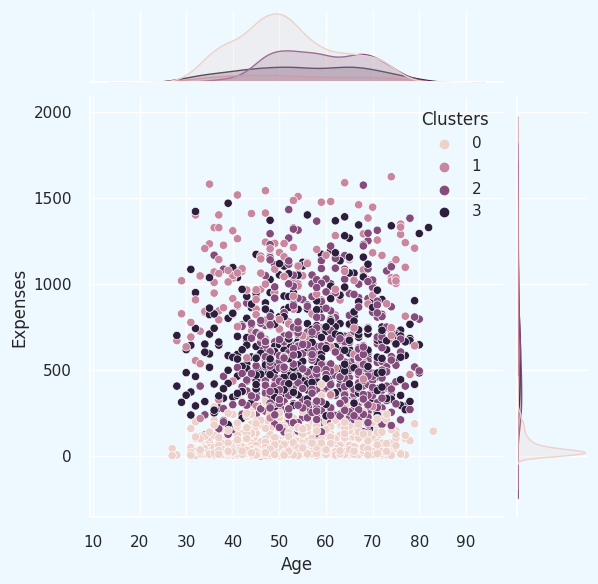

<Figure size 800x550 with 0 Axes>

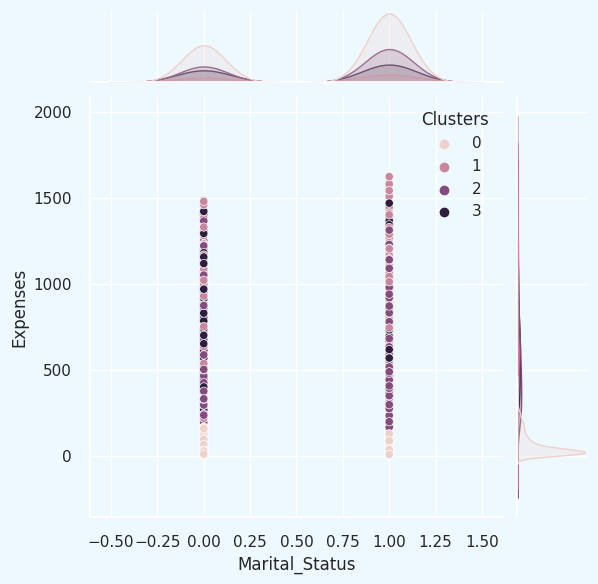

<Figure size 800x550 with 0 Axes>

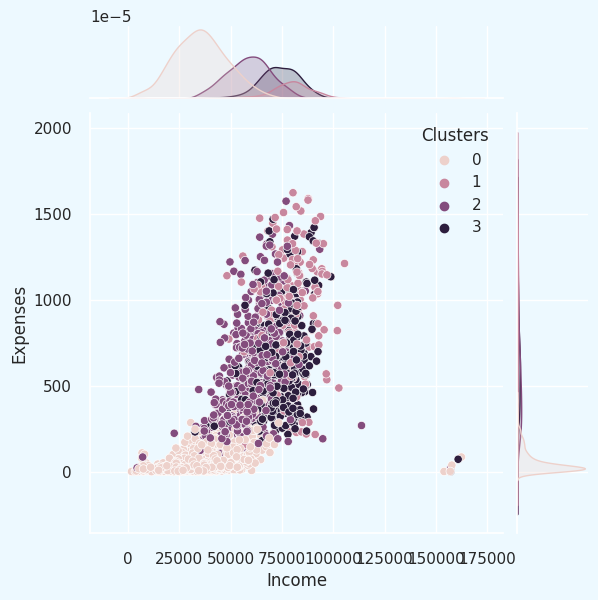

In [157]:
personal_info = ["Kids", "Education", "Age", "Marital_Status", "Income"]

for i in personal_info:
  plt.figure()
  sns.jointplot(x=data[i], y=data['Expenses'], hue=data['Clusters'], kind='scatter')
  plt.show()